In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
cars = ("/users/alfon/Desktop/Master/TFM/CSV/cars.csv")

In [6]:
df = pd.read_csv(cars)
df.head()

,Brand,Model,Version,Category,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,ZIP,Province,Price_EUR
0,SEAT,Cordoba,1.9 TDi Sport 90,Small,2000,254000,90,Manual,Diesel,4.9,5,18195,Granada,980
1,Mercedes-Benz,A 170,170CDI Largo,Small,2003,230000,95,Manual,Diesel,4.9,5,18151,Granada,2500
2,Fiat,500,1.2 Lounge,Small,2013,59529,69,Manual,Petrol,5.1,5,18015,Granada,5900
3,Dacia,Sandero,1.5dCi SL Nómada 66kW,Small,2018,43267,90,Manual,Diesel,3.8,5,18003,Granada,10490
4,Alfa-Romeo,Giulietta,1.4 TB 120 Super,Small,2018,82900,120,Manual,Petrol,7.2,5,18230,Granada,12900


Text(0.5, 1.0, 'Cars per Brand')

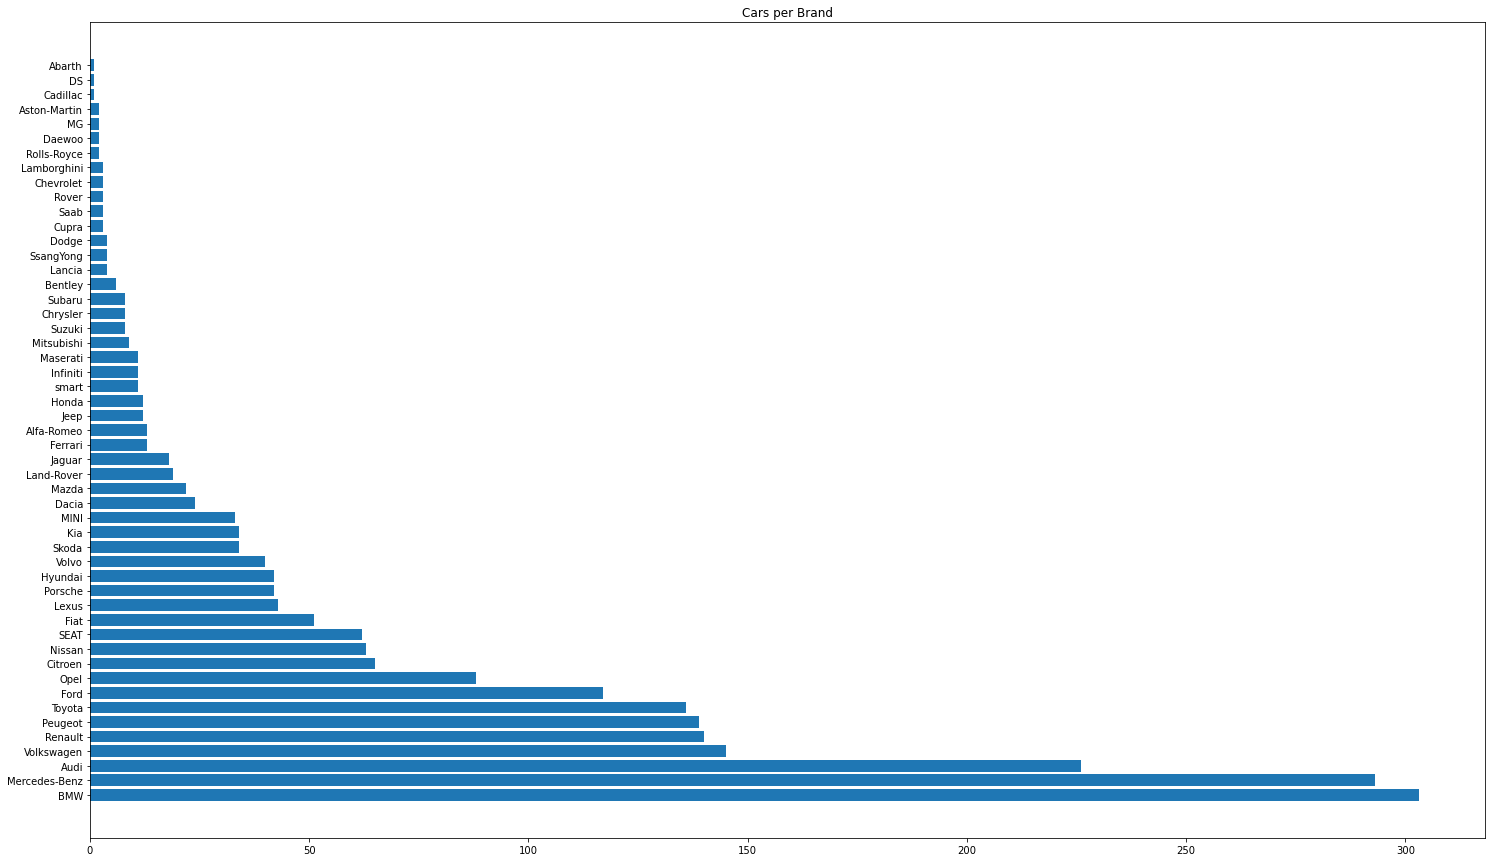

In [68]:
fig, ax = plt.subplots(figsize=(25,15))
plt.barh(df.Brand.value_counts().index, df.Brand.value_counts().values);
plt.title("Cars per Brand")

In [ ]:
df.groupby("Brand")["Price"]